In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
import os
import pandas as pd
import shutil
import zipfile

root_dir = '/content'
data_dir = '/content/titanic'

if os.path.exists(data_dir):
  shutil.rmtree(data_dir)

with zipfile.ZipFile(os.path.join(root_dir,'drive/MyDrive/data/titanic.zip'),'r') as file:
  file.extractall(data_dir)

In [ ]:
from google.colab import data_table

data_table.enable_dataframe_formatter

<function google.colab.data_table.enable_dataframe_formatter()>

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
d_type = {'PassengerId':np.int16,'Survived':np.int8,'Pclass':np.int8,
          'Name':object,'Sex':object,'Age':np.float64,'SibSp':np.int8,
          'Parch':np.int8,'Ticket':object,'Fare':np.float64,'Cabin':object,'Embarked':object}  #columns type

train_data = pd.read_csv(os.path.join(data_dir,'train.csv'), dtype = d_type) #train data load
test_data = pd.read_csv(os.path.join(data_dir,'test.csv'), dtype = d_type) #test data load

train_data.dtypes

PassengerId      int16
Survived          int8
Pclass            int8
Name            object
Sex             object
Age            float64
SibSp             int8
Parch             int8
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:

from sklearn.preprocessing import MinMaxScaler, Normalizer

def mm_scaler(train_df,test_df):                 #minmaxscaler
  #df_all = pd.concat([train_df,test_df],axis=0)
  minmax = MinMaxScaler()
  minmax.fit(train_df.values.reshape(-1,1))
  
  return minmax.transform(train_df.values.reshape(-1,1)),minmax.transform(test_df.values.reshape(-1,1))

def nm_scaler(train_df,test_df): #normalizer
  nmsc = Normalizer()
  nmsc.fit(train_df.values.reshape(-1,1))

  return nmsc.transform(train_df.values.reshape(-1,1)),nmsc.transform(test_df.values.reshape(-1,1))

def scatter(x,y,alp=0.2):       #scatter plot
  plt.figure(figsize=(14,2))
  plt.figure(figsize = (8,8))
  plt.scatter(train_data[x].loc[train_data.Survived == 0],train_data[y].loc[train_data.Survived == 0],color='red',alpha=alp)
  plt.scatter(train_data[x].loc[train_data.Survived == 1],train_data[y].loc[train_data.Survived == 1],color='blue',alpha=alp)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()

In [7]:
print(train_data.head(5))


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


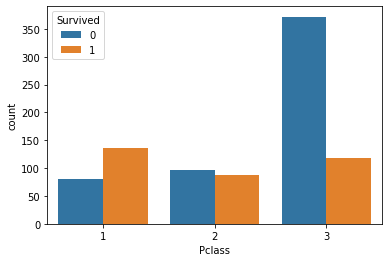

In [8]:
#Pclass

sns.countplot(x='Pclass', data = train_data, hue = 'Survived')   #등급이 높을 수록 생존률 높음
plt.show()

train_data.Pclass,test_data.Pclass = mm_scaler(train_data.Pclass,test_data.Pclass)

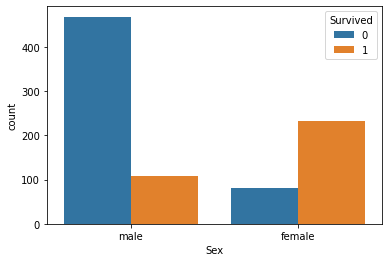

In [9]:
#Sex
sns.countplot(x='Sex', data = train_data, hue ='Survived')   #여성의 생존률 높음
plt.show()

train_data.Sex = train_data.Sex.replace({'male' : 0 ,'female' : 1}) #pre1
test_data.Sex = test_data.Sex.replace({'male' : 0,'female' : 1})


<Figure size 1008x144 with 0 Axes>

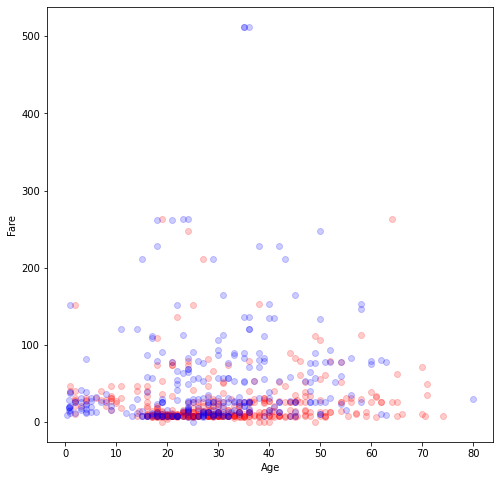

In [10]:
scatter('Age','Fare')


177


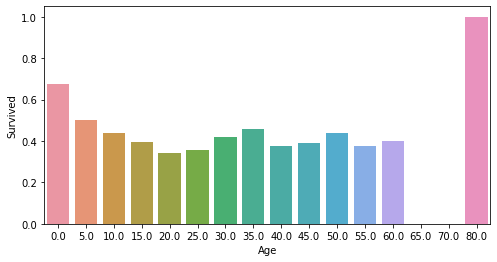

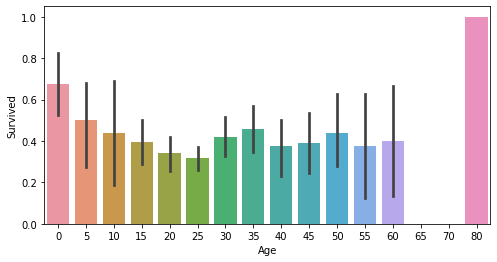



 False


In [11]:
#Age

print(train_data.Age.isna().sum())
Age_count = train_data.loc[:,['Survived','Age']]
Age_count.Age = train_data.Age.dropna().apply(lambda x: int(x//5*5))
Age_mean = Age_count.groupby('Age').mean()

plt.figure(figsize = (8,4))
sns.barplot(x=Age_mean.index,y=Age_mean.Survived)
plt.show()

Age_def = train_data.Age.mean()
train_data.Age.replace({np.nan:Age_def},inplace = True)
test_data.Age.replace({np.nan:Age_def},inplace = True)

train_data.Age = train_data.Age.apply(lambda x: int(x//5*5))
test_data.Age = test_data.Age.apply(lambda x: int(x//5*5))
plt.figure(figsize = (8,4))
sns.barplot(x='Age',y='Survived',data= train_data)

plt.show()
print('\n\n',train_data.Age.isna().any())

train_data.Age,test_data.Age = mm_scaler(train_data.Age,test_data.Age)

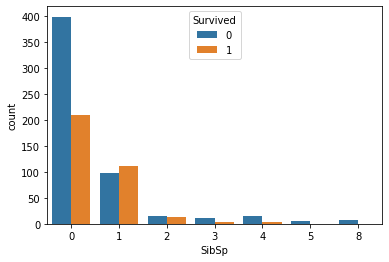

In [12]:
#SibSp

sns.countplot(data = train_data,x = 'SibSp',hue = 'Survived') #형제 or 배우자가 1명일 때 생존률 높음
plt.show()

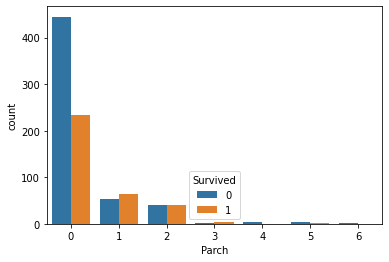

In [13]:
#Parch
sns.countplot(data=train_data,x='Parch',hue='Survived')   #sibsp와 유사함
plt.show()

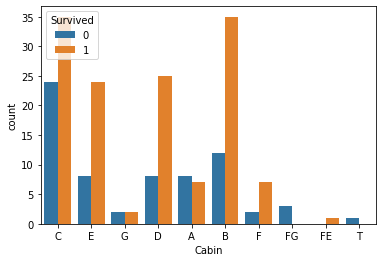

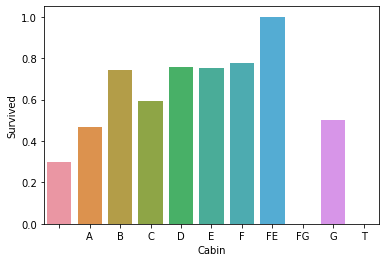

In [14]:
#Cabin

import re
from sklearn.preprocessing import LabelEncoder

alpha = re.compile('[ \d]*')
def Cabin_pre(text):
  if text == '':
    return text
  text = alpha.sub('',text)
  f = text[0]
  for i in range(1,len(text)):
    if text[i] != f:
      return text
  return text[0]
  #return text

le_cb = LabelEncoder()

train_data.Cabin.replace({None:''},inplace = True) #None값 -> ''
test_data.Cabin.replace({None:''},inplace = True)

train_data.Cabin = train_data.Cabin.apply(func = Cabin_pre) #Cabin을 영문자끼리 통합
test_data.Cabin = test_data.Cabin.apply(func = Cabin_pre)

sns.countplot(x = 'Cabin', data = train_data.loc[train_data.Cabin != ''], hue = 'Survived')
plt.show()

Cabin_gr = train_data.loc[:,['Cabin','Survived']].groupby('Cabin').mean()
sns.barplot(x = Cabin_gr.index ,y = Cabin_gr.Survived)
plt.show()

ccount = train_data.Cabin.value_counts()


In [15]:
cdel = []

def delcab(text):
  if text in cdel:
    return ''
  return text

for i in range(0,ccount.shape[0]):
  if ccount.iloc[i] < 5:
    cdel.append(ccount.index[i])

print(len(train_data.Cabin.value_counts()),'\n')
train_data.Cabin = train_data.Cabin.apply(delcab)   #value가 너무 적은 요소 제거
test_data.Cabin = test_data.Cabin.apply(delcab)

cabin = train_data[['Cabin','Survived']]
cabin = cabin.groupby('Cabin').mean().sort_values(by='Survived')

print(train_data.Cabin.value_counts())

data_table.DataTable(cabin,num_rows_per_page = 10)


11 

     696
C     59
B     47
D     33
E     32
A     15
F      9
Name: Cabin, dtype: int64


,Survived
Cabin,
,0.300287
A,0.466667
C,0.593220
B,0.744681
E,0.750000
D,0.757576
F,0.777778


In [16]:

le_cb.classes_ = cabin.index.tolist()   #분류한 Cabin 라벨링
print(le_cb.classes_)

train_data.Cabin = le_cb.transform(train_data.Cabin) #pre3
print(train_data.Cabin.head(5))


['', 'A', 'C', 'B', 'E', 'D', 'F']
0    0
1    2
2    0
3    2
4    0
Name: Cabin, dtype: int64


In [17]:
cabin_classes = le_cb.classes_
def Cabins(text):
  if text in cabin_classes:
    return text
  return ''

test_data.Cabin = test_data.Cabin.apply(func = Cabins)  #test데이터에만 존재하는 Cabin 예외
test_data.Cabin = le_cb.transform(test_data.Cabin)

train_data.Cabin,test_data.Cabin = mm_scaler(train_data.Cabin,test_data.Cabin)

embark_isnull :  True


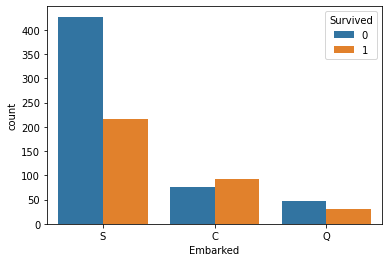

In [18]:
#Embarked

embark = train_data[['Survived','Embarked']]
group_eb = embark.groupby('Embarked')
#null값 존재 확인
print('embark_isnull : ',embark.Embarked.isna().any())

sns.countplot(x = 'Embarked',data = train_data,hue = 'Survived')   #Q에서 탑승한 사람 생존률 높음
plt.show()

eb_label = {'S':0,'Q':1,'C':2,None :0}
train_data.Embarked.replace(eb_label,inplace = True) #None값 S로 전환
test_data.Embarked.replace(eb_label,inplace = True)

train_data.Embarked,test_data.Embarked = mm_scaler(train_data.Embarked,test_data.Embarked)

In [19]:
#Ticket

def delint(text):
  text = re.sub('[^\w]','',text)    #영문,숫자 제외 삭제
  text = re.sub('([0-9]{1})([0-9]*)','\g<1>',text)    #숫자 축소
  if re.match('[a-zA-Z][0-9]*',text):                 #영문,숫자 동시 존재시 영문만 남김
    text = text[0]
  return re.sub('([a-zA-Z]{1})([a-zA-Z]*)','\g<1>',text)    #영문 축소

tdel = []
def deltic(text):
  if text in tdel:
    return ''
  return text

train_data.Ticket = train_data.Ticket.apply(func = delint)    #value 4개 이하인 요소 분류
test_data.Ticket = test_data.Ticket.apply(func = delint)
ticket = train_data[['Survived','Ticket']]
tcount = ticket.Ticket.value_counts()
print(tcount)

for i in range(0,tcount.shape[0]):
  if tcount.iloc[i] < 5:
    tdel.append(tcount.index[i])

print(tdel)

ticket = ticket.groupby('Ticket').mean().sort_values(by = 'Survived')

data_table.DataTable(ticket,num_rows_per_page=10)


3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
Name: Ticket, dtype: int64
['L', '5', '8', '9']


,Survived
Ticket,
5,0.000000
8,0.000000
A,0.068966
7,0.111111
W,0.153846
6,0.166667
4,0.200000
3,0.239203
L,0.250000


In [20]:
le_tk = LabelEncoder()
ticket.drop(tdel,inplace = True)

train_data.Ticket = train_data.Ticket.apply(deltic)
test_data.Ticket = test_data.Ticket.apply(deltic)

tic2list = ticket.index.to_list()
tic2list.insert(0,'')
print(tic2list)
le_tk.classes_ = tic2list
train_data.Ticket = le_tk.transform(train_data.Ticket)  #분류된 Ticket 라벨링
print(train_data.Ticket.head(5))


['', 'A', '7', 'W', '6', '4', '3', 'S', 'C', '2', 'F', '1', 'P']
0     1
1    12
2     7
3    11
4     6
Name: Ticket, dtype: int64


In [21]:
def ticketna(text):
  if text in tic2list:
    return text
  return ''


test_data.Ticket = test_data.Ticket.apply(func = ticketna)  #train data에 없는 요소 예외
test_data.Ticket = le_tk.transform(test_data.Ticket)

train_data.Ticket,test_data.Ticket = mm_scaler(train_data.Ticket,test_data.Ticket)

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


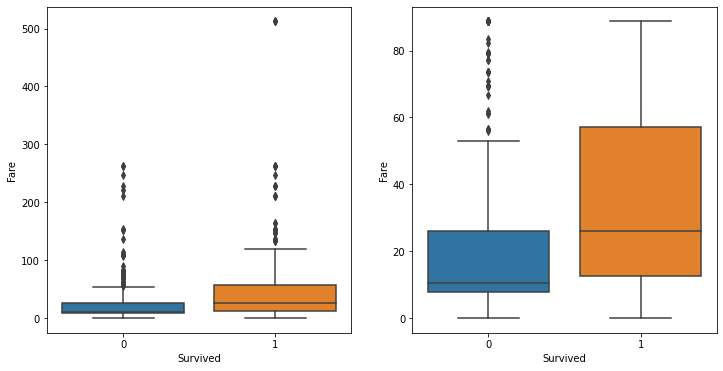

In [22]:
#Fare
print(train_data.Fare.describe())

def outlier(data):
  q25 = np.percentile(train_data.Fare,25)
  q75 = np.percentile(train_data.Fare,75)
  iqr = (q75-q25) * 2.5

  lowest = q25 - iqr
  highest = q75 + iqr
  if data > highest:
    return highest
  elif data < lowest:
    return lowest
  return data

plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
#plt.figure(figsize = (6,4))
sns.boxplot(x=train_data.Survived, y=train_data.Fare)

train_data.Fare = train_data.Fare.apply(outlier)
test_data.Fare = test_data.Fare.apply(outlier)

plt.subplot(1,2,2)
sns.boxplot(x=train_data.Survived, y=train_data.Fare)
plt.show()

train_data.Fare,test_data.Fare = mm_scaler(train_data.Fare,test_data.Fare)

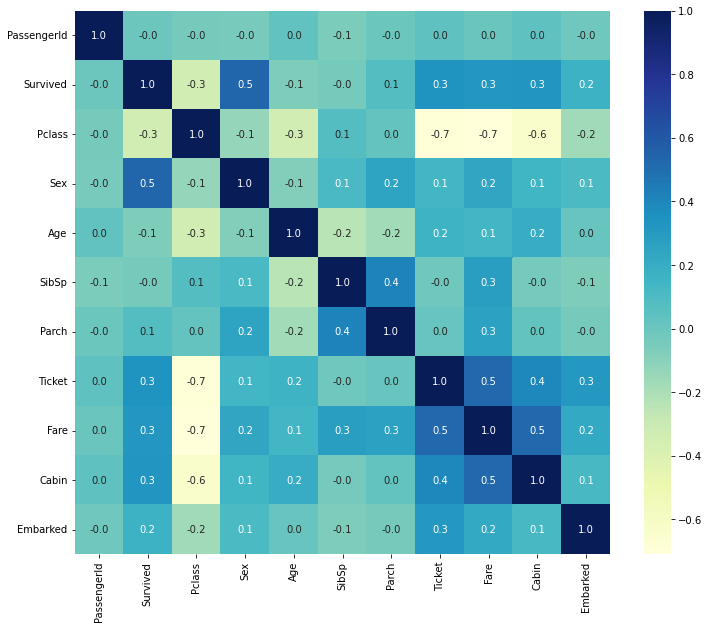

In [23]:

plt.figure(figsize = (12,10))
sns.heatmap(train_data.corr(),annot=True,fmt = '.1f',cmap = 'YlGnBu')


In [24]:
use_columns = ['Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked','Ticket']
drop_col = []
use_columns = [u for u in use_columns if not u in drop_col]
label_column = ['Survived']

x_train = train_data[use_columns]
print(x_train.head(5))
print(len(x_train))

y_train = train_data[label_column]
print(y_train.head(5))
print(len(x_train))



   Pclass  Sex     Age  SibSp  Parch      Fare     Cabin  Embarked    Ticket
0     1.0    0  0.2500      1      0  0.081714  0.000000       0.0  0.083333
1     0.0    1  0.4375      1      0  0.803427  0.333333       1.0  1.000000
2     1.0    1  0.3125      0      0  0.089322  0.000000       0.0  0.583333
3     0.0    1  0.4375      1      0  0.598485  0.333333       0.0  0.916667
4     1.0    0  0.4375      0      0  0.090731  0.000000       0.0  0.500000
891
   Survived
0         0
1         1
2         1
3         1
4         0
891


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.utils.validation import column_or_1d

y_train = column_or_1d(y_train)

x_data = x_train
y_data = y_train
rs = [259,351,732,135]


x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size = 0.2,random_state = rs[1],stratify = y_train)

print(y_train.mean())
print(y_test.mean())

0.38342696629213485
0.3854748603351955


In [26]:
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier



Models = ['AdaBoost','ExtraTrees','GradientBoosting','RandomForest','HistGradientBoosting','GaussianProcessClassifier','RidgeClassifier',
          'KNeighborsClassifier','DecisionTreeClassifier','ExtraTreeClassifier']

Classifiers = {'AdaBoost' : AdaBoostClassifier(),
'ExtraTrees' : ExtraTreesClassifier(),
'GradientBoosting' : GradientBoostingClassifier(),
'RandomForest' : RandomForestClassifier(),
'HistGradientBoosting' : HistGradientBoostingClassifier(),
'GaussianProcessClassifier' : GaussianProcessClassifier(),
'RidgeClassifier' : RidgeClassifier(),
'KNeighborsClassifier' : KNeighborsClassifier(n_neighbors = 3),
#'RadiusNeighborsClassifier' : RadiusNeighborsClassifier(radius=5.0),
'DecisionTreeClassifier' : DecisionTreeClassifier(),
'ExtraTreeClassifier' : ExtraTreeClassifier()}

In [27]:

from sklearn.metrics import accuracy_score, f1_score

res = pd.DataFrame(columns = ['model','train_acc','test_acc','test_f1_score'])

for name in Models:
  model = Classifiers[name]
  model.fit(x_train,y_train)
  print(name)

  y_predict = model.predict(x_test)

  train_acc = accuracy_score(y_train,model.predict(x_train))
  test_acc = accuracy_score(y_test,y_predict)
  test_f1_score = f1_score(y_test,y_predict)


  df = pd.DataFrame(data = [[name,train_acc,test_acc,test_f1_score]],columns =['model','train_acc','test_acc','test_f1_score'])
  res = res.append(df)

res.sort_values(by='test_acc',ascending=False,ignore_index = True)

AdaBoost
ExtraTrees
GradientBoosting
RandomForest
HistGradientBoosting
GaussianProcessClassifier
RidgeClassifier
KNeighborsClassifier
DecisionTreeClassifier
ExtraTreeClassifier


,model,train_acc,test_acc,test_f1_score
0,KNeighborsClassifier,0.876404,0.810056,0.734375
1,ExtraTrees,0.974719,0.804469,0.720000
2,GradientBoosting,0.907303,0.798883,0.709677
3,HistGradientBoosting,0.942416,0.798883,0.718750
4,RandomForest,0.974719,0.793296,0.713178
5,AdaBoost,0.839888,0.787709,0.683333
6,DecisionTreeClassifier,0.974719,0.782123,0.706767
7,GaussianProcessClassifier,0.845506,0.776536,0.672131
8,RidgeClassifier,0.813202,0.776536,0.682540
9,ExtraTreeClassifier,0.974719,0.765363,0.686567


In [28]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(shuffle = True,random_state= 397)


In [29]:
#HistGradientBoosting


HGB_model = HistGradientBoostingClassifier()
HGB_params = {'learning_rate': [0.01],'max_depth': [10,11,12],'min_samples_leaf': [22,24],'max_iter': [70,80,90],'l2_regularization': [0,0.002]}

HGB_grid = GridSearchCV(estimator = HGB_model,param_grid = HGB_params, cv = kf, n_jobs=-1,scoring='accuracy',verbose = 1)
HGB_grid.fit(x_data,y_data)

print(HGB_grid.best_params_)
print(HGB_grid.best_score_)
HGB_res = pd.DataFrame(HGB_grid.cv_results_)

HGB_res[['params','mean_test_score']].sort_values(by = ['mean_test_score'],ascending = False).head(10)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'l2_regularization': 0, 'learning_rate': 0.01, 'max_depth': 10, 'max_iter': 90, 'min_samples_leaf': 22}
0.8125666938673028


,params,mean_test_score
4,"{'l2_regularization': 0, 'learning_rate': 0.01...",0.812567
22,"{'l2_regularization': 0.002, 'learning_rate': ...",0.812567
16,"{'l2_regularization': 0, 'learning_rate': 0.01...",0.811443
34,"{'l2_regularization': 0.002, 'learning_rate': ...",0.811443
28,"{'l2_regularization': 0.002, 'learning_rate': ...",0.811443
10,"{'l2_regularization': 0, 'learning_rate': 0.01...",0.811443
35,"{'l2_regularization': 0.002, 'learning_rate': ...",0.803584
5,"{'l2_regularization': 0, 'learning_rate': 0.01...",0.803584
29,"{'l2_regularization': 0.002, 'learning_rate': ...",0.803584
23,"{'l2_regularization': 0.002, 'learning_rate': ...",0.803584


In [ ]:
#RandomForest

RF_model = RandomForestClassifier()
RF_params = {'criterion':['entropy'], 'n_estimators':[110,120,130], 'max_depth':[12,14,16],'max_features':['log2'],'max_leaf_nodes':[40,60,80]}

RF_grid = GridSearchCV(estimator = RF_model,param_grid = RF_params, cv = kf,n_jobs = -1, scoring = 'accuracy',verbose = 1)
RF_grid.fit(x_data,y_data)

print(RF_grid.best_params_)
print(RF_grid.best_score_)
RF_res = pd.DataFrame(RF_grid.cv_results_)

RF_res[['params','mean_test_score']].sort_values(by=['mean_test_score'],ascending=False).head(10)

In [ ]:
#GradientBoosting

GB_model = GradientBoostingClassifier()
GB_params = {'learning_rate' : [0.01],'n_estimators' : [100,110,120],'subsample':[0.8,1.0],'max_depth' : [3,4,5,6],'max_features' : ['log2']}

GB_grid = GridSearchCV(estimator = GB_model, param_grid = GB_params, cv=kf, n_jobs=-1, scoring = 'accuracy', verbose = 1)
GB_grid.fit(x_data,y_data)

print(GB_grid.best_params_)
print(GB_grid.best_score_)
GB_res = pd.DataFrame(GB_grid.cv_results_)

GB_res[['params','mean_test_score']].sort_values(by = ['mean_test_score'],ascending=False).head(10)

In [ ]:
#test_data

test_data.Fare.replace({np.nan:0},inplace = True)#fare nan

res_data = pd.DataFrame(columns = ['PassengerID','Survived'])
x_res = test_data[use_columns]
print(x_res.isna().any())

final_model = RandomForestClassifier(
    criterion= 'entropy', max_depth= 14, max_features= 'log2', max_leaf_nodes= 60, n_estimators= 120
)

final_model.fit(x_data,y_data)
test_data['Survived'] = final_model.predict(x_res)
print(test_data.Survived.mean())
print(test_data.tail(5))

result = test_data[['PassengerId','Survived']]
result.to_csv(os.path.join(root_dir,'predictions.csv'),index = False)

In [ ]:
importance = pd.Series(final_model.feature_importances_,x_data.columns).sort_values(ascending = False)
plt.bar(importance.index,importance.values)

In [34]:
predic = pd.read_csv(os.path.join(root_dir,'predictions.csv'))
print(predic)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]
